# Exercise 01: Sampling Theorem
\- Gugliemo Grillo

<div>
<center>
    <img src="https://i.ibb.co/BBBWNCt/Sampling.png" width="400"/>
</center>
</div>

### Continuous Fourier Transform
The continuous Fourier transform can be evaluated as
$$ s(\omega) = \int_{-\infty}^{+\infty}s(t) e^{-i \omega t} dt$$

For this problem the integral was solved using Wolfram Mathematica. If in doubt, check on [Wolfram|Alpha](https://www.wolframalpha.com/). The solution is:
$$s(\omega) = -\frac{i}{2\sqrt{2\pi}} \bigl(\frac{1}{1/\Delta T-i(\omega+2\pi\nu_0)} - \frac{1}{1/\Delta T-i(\omega-2\pi\nu_0)} \bigr)$$

In [16]:
# packages used
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Given constans
DeltaT = 10
f0 = 10
fs = [20, 21, 50, 100]

# Function definition
def signalT(t):
    return np.exp(-1*t/DeltaT)*np.heaviside(t, 0)*np.sin(2*np.pi*f0*t)

def signalF(f):
    return 1j/(2*np.sqrt(2*np.pi))*(
             1/(1/DeltaT - 1j*(f+2*np.pi*f0))
            -1/(1/DeltaT - 1j*(f-2*np.pi*f0)))

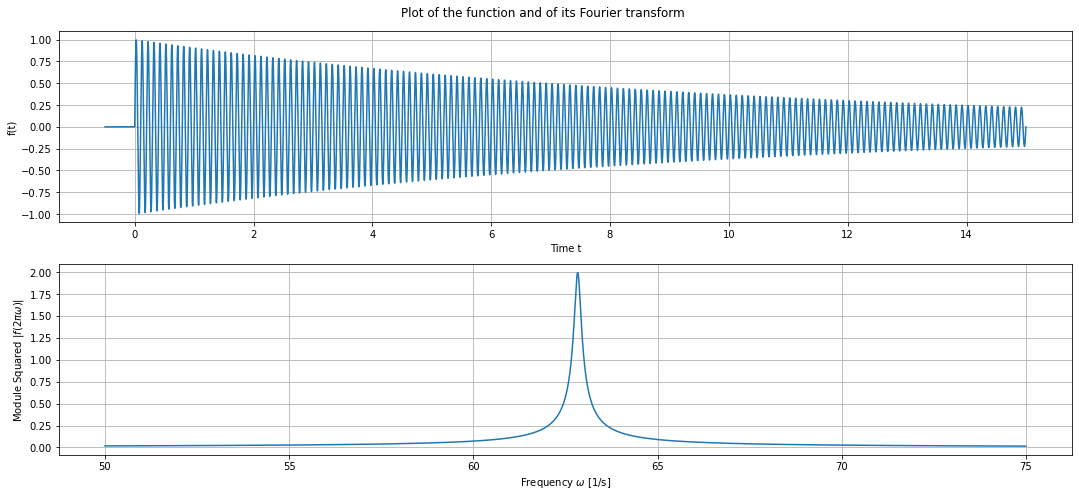

In [37]:
t = np.linspace(-0.5, 15, int(1e6))
f = np.linspace(50, 75, int(1e6))

# Bode plot
plt.rcParams.update({'font.size': 10})
fig, axis = plt.subplots(2,1, figsize=(15, 7))
fig.suptitle('Plot of the function and of its Fourier transform')

axis[0].plot(t, signalT(t) )
axis[0].set_xlabel("Time t")
axis[0].set_ylabel("f(t)")
axis[0].grid(True, which="both")

axis[1].plot(f, np.abs(signalF(f)) )
axis[1].set_xlabel(r"Frequency $\omega$ [1/s]")
axis[1].set_ylabel(r"Module Squared $|f(2 \pi \omega)|$")
axis[1].grid(True, which="both")

plt.tight_layout()
plt.show()

### Sample and estimation of aliases for the given frequencies
The sampling can be done by saving points with frequency $f_s$. The reconstruction is done via Shannon Interpolation method:


In [41]:
t_sampling = np.arange(-1, +20, step=1/fs[0])

t_sampling

(420,)

### Error estimation within given ranges
